# EXPLORACIÓN INICIAL - DATASETS TRANSPORTE DE MERCANCÍAS POR CARRETERA EN ESPAÑA (2017-2024) - MITMA

In [71]:

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import tex as tx

# Configuración para mejor visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente!")

✅ Librerías importadas correctamente!


In [72]:
# Definir la ruta base donde están los datos
import os

# Ruta a la carpeta de datos
ruta_datos = os.path.join('..', 'data', 'raw', 'csv')

# Listar todos los archivos CSV disponibles
archivos_csv = [f for f in os.listdir(ruta_datos) if f.endswith('.csv')]
print(f"📁 Se encontraron {len(archivos_csv)} archivos CSV:")
for archivo in archivos_csv:
    print(f"   - {archivo}")

📁 Se encontraron 8 archivos CSV:
   - CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__CCAA_TipoMercancia_TipoDesplaz_Anyo.csv
   - CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Carr_entre_CCAAs_Anyo.csv
   - CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_TipoDesplaz_Anyo.csv
   - CO497_indice_precios_TRM_Carr__tramosDistancias.csv
   - CO516_Superficie_Instalacs_Logistica_Carr__TipoInstalac_CCAA_Provincia.csv
   - CO519_Trafico_Total_Merc__ModoTransporte_TipoTrafico_Anyo.csv
   - CO597_CO598_TRM_int_CAR_Tn_TnKm_Merc_RecibExped_ESP__paises_OrigenDestino.csv
   - CO614_Coste_TRM_Carr__tipo_veh.csv


In [73]:
resumen_general = []

for archivo in archivos_csv:
    path = os.path.join(ruta_datos, archivo)
    df = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')
    
    resumen = {
        "archivo": archivo,
        "filas": df.shape[0],
        "columnas": df.shape[1],
        "columnas_nombres": list(df.columns[:5]),
        "anios_unicos": [col for col in df.columns if "Año" in col or "Anyo" in col or "year" in col],
    }
    resumen_general.append(resumen)

pd.DataFrame(resumen_general)

,archivo,filas,columnas,columnas_nombres,anios_unicos
0,CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__...,15200,10,"[year2, comunidad2, Tipo_transporte3, tipo_des...",[year2]
1,CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Car...,3600,5,"[year, ComunidadOrigen, Unidad, ComunidadDesti...",[year]
2,CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_Tipo...,1728,13,"[comunidad, Estado_Operacion, year, Tipo_trans...",[year]
3,CO497_indice_precios_TRM_Carr__tramosDistancia...,96,4,"[year, nombreOPTMC_tram_dist, nombreOTRVC_conc...",[year]
4,CO516_Superficie_Instalacs_Logistica_Carr__Tip...,10402,17,"[year, comunidad, provincia, nombreAliMkt_tipo...",[year]
5,CO519_Trafico_Total_Merc__ModoTransporte_TipoT...,66,7,"[year, TipoTrafico, ModoTransporte, Textbox15,...",[year]
6,CO597_CO598_TRM_int_CAR_Tn_TnKm_Merc_RecibExpe...,992,9,"[nombreZonaAreaGeoMundo, Pais, tipo_desplazami...",[year]
7,CO614_Coste_TRM_Carr__tipo_veh.csv,4162,12,"[vehiculo, tipo_coste_anual, super_tipo_costes...",[year]


# EXPLORACIÓN DATASET TONELADAS TRANSPORTADAS POR CCAA Y TIPO DE MERCANCÍA 2017-2024

In [74]:

path = os.path.join(ruta_datos, "CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__CCAA_TipoMercancia_TipoDesplaz_Anyo.csv")
df_280 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

In [75]:
# Vista general
print("Shape:", df_280.shape)
print("\nColumnas:")
print(df_280.columns.tolist())
df_280.tail(10)

Shape: (15200, 10)

Columnas:
['year2', 'comunidad2', 'Tipo_transporte3', 'tipo_desplazamiento2', 'Tipo_mercancia2', 'Unidad2', 'valor2', 'Textbox3', 'Textbox277', 'Textbox279']


,year2,comunidad2,Tipo_transporte3,tipo_desplazamiento2,Tipo_mercancia2,Unidad2,valor2,Textbox3,Textbox277,Textbox279
15190,2024,Total 2024,Transporte internacional 2024,Recibido,Productos metalúrgicos,Miles de toneladas,"1.503,96","4.001,30",Total 2024,"47.805,25"
15191,2024,Total 2024,Transporte internacional 2024,Recibido,Productos metalúrgicos,Millones de toneladas-kilómetro,"1.399,70","3.597,15",Total 2024,"11.921,44"
15192,2024,Total 2024,Transporte internacional 2024,Recibido,Minerales en bruto o manufacturados y material...,Miles de toneladas,"1.299,85","8.097,53",Total 2024,"576.862,99"
15193,2024,Total 2024,Transporte internacional 2024,Recibido,Minerales en bruto o manufacturados y material...,Millones de toneladas-kilómetro,"685,89","3.876,85",Total 2024,"31.544,71"
15194,2024,Total 2024,Transporte internacional 2024,Recibido,Abonos,Miles de toneladas,"353,78","1.083,21",Total 2024,"30.046,58"
15195,2024,Total 2024,Transporte internacional 2024,Recibido,Abonos,Millones de toneladas-kilómetro,"309,98","669,13",Total 2024,"4.146,78"
15196,2024,Total 2024,Transporte internacional 2024,Recibido,Productos químicos,Miles de toneladas,"3.297,80","6.776,54",Total 2024,"60.311,20"
15197,2024,Total 2024,Transporte internacional 2024,Recibido,Productos químicos,Millones de toneladas-kilómetro,"3.292,82","6.634,32",Total 2024,"16.377,41"
15198,2024,Total 2024,Transporte internacional 2024,Recibido,"Máquinas, vehículos, objetos manufacturados y ...",Miles de toneladas,"13.555,98","26.057,45",Total 2024,"346.178,48"
15199,2024,Total 2024,Transporte internacional 2024,Recibido,"Máquinas, vehículos, objetos manufacturados y ...",Millones de toneladas-kilómetro,"15.468,73","27.276,81",Total 2024,"83.600,02"


In [76]:
# Tipos de datos
df_280.info()

# Valores nulos
print("\nPorcentaje de nulos por columna:")
print(df_280.isna().mean().round(3)*100)

# Valores únicos por columna
print("\nValores únicos por columna:")
for c in df_280.columns:
    print(f"{c}: {df_280[c].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year2                 15200 non-null  int64 
 1   comunidad2            15200 non-null  object
 2   Tipo_transporte3      15200 non-null  object
 3   tipo_desplazamiento2  15200 non-null  object
 4   Tipo_mercancia2       15200 non-null  object
 5   Unidad2               15200 non-null  object
 6   valor2                13496 non-null  object
 7   Textbox3              14104 non-null  object
 8   Textbox277            15200 non-null  object
 9   Textbox279            15068 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB

Porcentaje de nulos por columna:
year2                    0.0
comunidad2               0.0
Tipo_transporte3         0.0
tipo_desplazamiento2     0.0
Tipo_mercancia2          0.0
Unidad2                  0.0
valor2                  11.2
Text

In [77]:
# Copia de trabajo
df = df_280.copy()

# Renombrar columnas
df.columns = ['year', 'comunidad', 'tipo_transporte', 'tipo_desplazamiento',
              'tipo_mercancia', 'unidad', 'valor', 'textbox3', 'textbox277', 'textbox279']

In [78]:
# Eliminar columnas innecesarias
df = df.drop(columns=['textbox3', 'textbox277', 'textbox279'])

# Normalizar texto
for c in ['comunidad', 'tipo_transporte', 'tipo_desplazamiento', 'tipo_mercancia', 'unidad']:
    df[c] = df[c].astype(str).str.strip().str.lower()

# Convertir valor a numérico
df['valor'] = (df['valor']
               .astype(str)
               .str.replace('.', '', regex=False)
               .str.replace(',', '.', regex=False)
               .astype(float))

# Filtrar filas no nulas
df = df.dropna(subset=['valor'])
df

,year,comunidad,tipo_transporte,tipo_desplazamiento,tipo_mercancia,unidad,valor
0,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,miles de toneladas,3372.36
1,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,millones de toneladas-kilómetro,31.79
2,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,miles de toneladas,2702.69
3,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,millones de toneladas-kilómetro,28.95
6,2017,andalucía,transporte intrarregional,intramunicipal,productos petrolíferos,miles de toneladas,1343.97
...,...,...,...,...,...,...,...
15195,2024,total 2024,transporte internacional 2024,recibido,abonos,millones de toneladas-kilómetro,309.98
15196,2024,total 2024,transporte internacional 2024,recibido,productos químicos,miles de toneladas,3297.80
15197,2024,total 2024,transporte internacional 2024,recibido,productos químicos,millones de toneladas-kilómetro,3292.82
15198,2024,total 2024,transporte internacional 2024,recibido,"máquinas, vehículos, objetos manufacturados y ...",miles de toneladas,13555.98


In [79]:
# Crear campo de toneladas normalizadas
df['valor_toneladas'] = np.where(
    df['unidad'].str.contains('miles de toneladas', case=False),
    df['valor'] * 1000,  # convertir a toneladas
    np.nan
)

# Filtrar solo toneladas
df_ton = df[df['unidad'].str.contains('miles de toneladas', case=False)].copy()

# Vista previa
df_ton.head(10)



,year,comunidad,tipo_transporte,tipo_desplazamiento,tipo_mercancia,unidad,valor,valor_toneladas
0,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,miles de toneladas,3372.36,3372360.0
2,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,miles de toneladas,2702.69,2702690.0
6,2017,andalucía,transporte intrarregional,intramunicipal,productos petrolíferos,miles de toneladas,1343.97,1343970.0
8,2017,andalucía,transporte intrarregional,intramunicipal,minerales y residuos para refundición,miles de toneladas,747.91,747910.0
10,2017,andalucía,transporte intrarregional,intramunicipal,productos metalúrgicos,miles de toneladas,368.12,368120.0
12,2017,andalucía,transporte intrarregional,intramunicipal,minerales en bruto o manufacturados y material...,miles de toneladas,35954.43,35954430.0
14,2017,andalucía,transporte intrarregional,intramunicipal,abonos,miles de toneladas,1037.90,1037900.0
16,2017,andalucía,transporte intrarregional,intramunicipal,productos químicos,miles de toneladas,357.38,357380.0
18,2017,andalucía,transporte intrarregional,intramunicipal,"máquinas, vehículos, objetos manufacturados y ...",miles de toneladas,2335.39,2335390.0
20,2017,andalucía,transporte intrarregional,intermunicipal intrarregional,productos agrícolas y animales vivos,miles de toneladas,13072.05,13072050.0


In [80]:
# Filtrar solo toneladas-km
df_ton_km = df[df['unidad'].str.contains('millones de toneladas-kilómetro', case=False)].copy()

# Vista previa
df_ton_km.head(10)

# Eliminar columnas innecesarias
df_ton_km= df_ton_km.drop(columns=['valor_toneladas'])

In [81]:
# Revisar las filas con totales
df_ton[df_ton['comunidad'].str.contains('total', case=False)].head(10)

,year,comunidad,tipo_transporte,tipo_desplazamiento,tipo_mercancia,unidad,valor,valor_toneladas
1800,2017,total 2017,transporte intrarregional 2017,intramunicipal,productos agrícolas y animales vivos,miles de toneladas,17341.49,17341490.0
1802,2017,total 2017,transporte intrarregional 2017,intramunicipal,productos alimenticios y forrajes,miles de toneladas,21619.72,21619720.0
1804,2017,total 2017,transporte intrarregional 2017,intramunicipal,combustibles minerales sólidos,miles de toneladas,3370.30,3370300.0
1806,2017,total 2017,transporte intrarregional 2017,intramunicipal,productos petrolíferos,miles de toneladas,6183.36,6183360.0
1808,2017,total 2017,transporte intrarregional 2017,intramunicipal,minerales y residuos para refundición,miles de toneladas,4831.99,4831990.0
1810,2017,total 2017,transporte intrarregional 2017,intramunicipal,productos metalúrgicos,miles de toneladas,4408.91,4408910.0
1812,2017,total 2017,transporte intrarregional 2017,intramunicipal,minerales en bruto o manufacturados y material...,miles de toneladas,141182.82,141182820.0
1814,2017,total 2017,transporte intrarregional 2017,intramunicipal,abonos,miles de toneladas,4994.66,4994660.0
1816,2017,total 2017,transporte intrarregional 2017,intramunicipal,productos químicos,miles de toneladas,5129.54,5129540.0
1818,2017,total 2017,transporte intrarregional 2017,intramunicipal,"máquinas, vehículos, objetos manufacturados y ...",miles de toneladas,30513.73,30513730.0


In [82]:
# Quitar los años incrustados (4 dígitos consecutivos) dentro del texto
df_ton['tipo_transporte'] = df_ton['tipo_transporte'].str.replace(r'\b20\d{2}\b', '', regex=True)
df_ton_km['tipo_transporte'] = df_ton_km['tipo_transporte'].str.replace(r'\b20\d{2}\b', '', regex=True)

# Eliminar espacios redundantes
df_ton['tipo_transporte'] = df_ton['tipo_transporte'].str.strip()
df_ton_km['tipo_transporte'] = df_ton_km['tipo_transporte'].str.strip()

# Comprobar valores únicos limpios
print(df_ton['tipo_transporte'].unique())

['transporte intrarregional' 'transporte interregional'
 'transporte internacional']


In [83]:
# Filtrar las filas que NO son totales
df_ton = df_ton[~df_ton['comunidad'].str.contains('total', case=False)].copy()
df_ton_km = df_ton_km[~df_ton_km['comunidad'].str.contains('total', case=False)].copy()

print("Filas después de limpiar:", df_ton.shape[0])
print("Comunidades únicas:", df_ton['comunidad'].nunique())


Filas después de limpiar: 6353
Comunidades únicas: 15


year
2017    1.665235e+09
2018    1.727928e+09
2019    1.809631e+09
2020    1.741722e+09
2021    1.937052e+09
2022    1.898371e+09
2023    1.901138e+09
2024    1.961313e+09
Name: valor_toneladas, dtype: float64


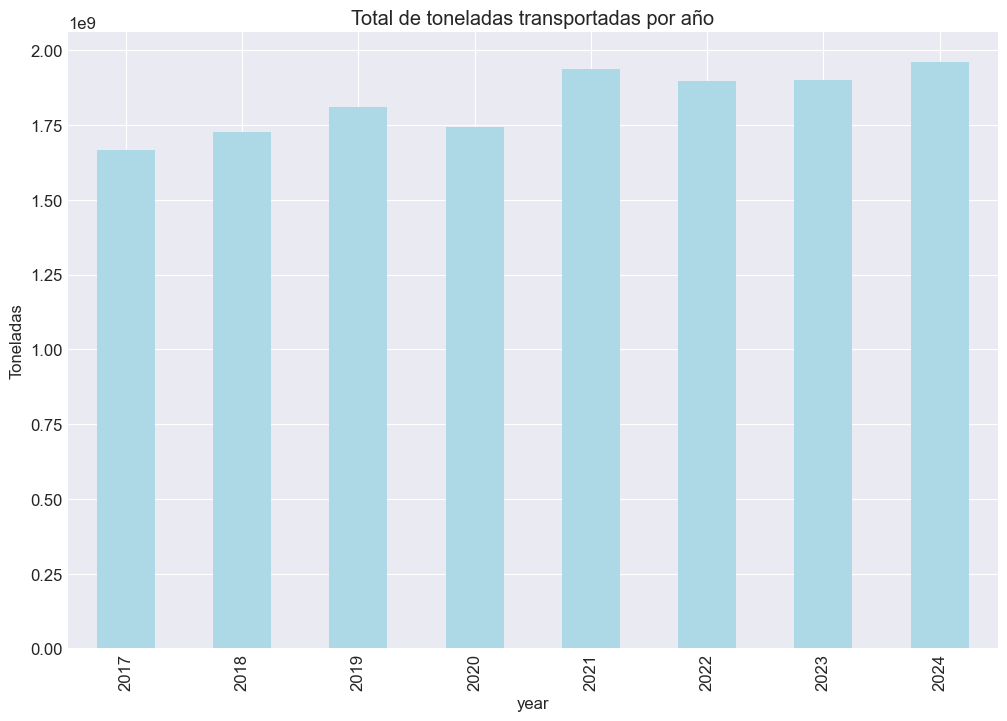

comunidad
cataluña                2.236754e+09
comunitat valenciana    2.065531e+09
andalucía               2.065352e+09
madrid, comunidad de    1.226662e+09
castilla y león         1.186999e+09
Name: valor_toneladas, dtype: float64


In [84]:
# Total por año
toneladas_por_ano = df_ton.groupby('year')['valor_toneladas'].sum().sort_index()
print(toneladas_por_ano)

# Visualización
toneladas_por_ano.plot(kind='bar',color="lightblue",title='Total de toneladas transportadas por año')
plt.ylabel('Toneladas')
plt.show()

# Top 10 comunidades
top_ccaa = df_ton.groupby('comunidad')['valor_toneladas'].sum().sort_values(ascending=False).head(5)
print(top_ccaa)

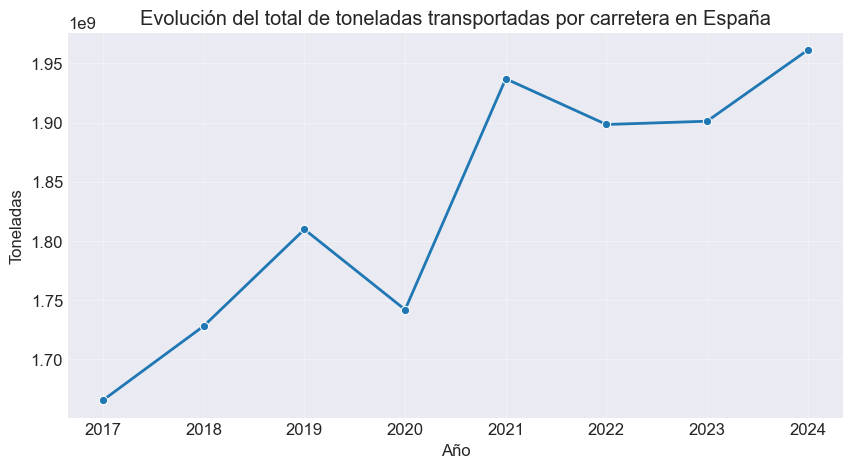

In [85]:
# Total nacional por año
evolucion = df_ton.groupby('year')['valor_toneladas'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=evolucion, x='year', y='valor_toneladas', marker='o', linewidth=2)
plt.title('Evolución del total de toneladas transportadas por carretera en España')
plt.xlabel('Año')
plt.ylabel('Toneladas')
plt.grid(True, alpha=0.3)
plt.show()

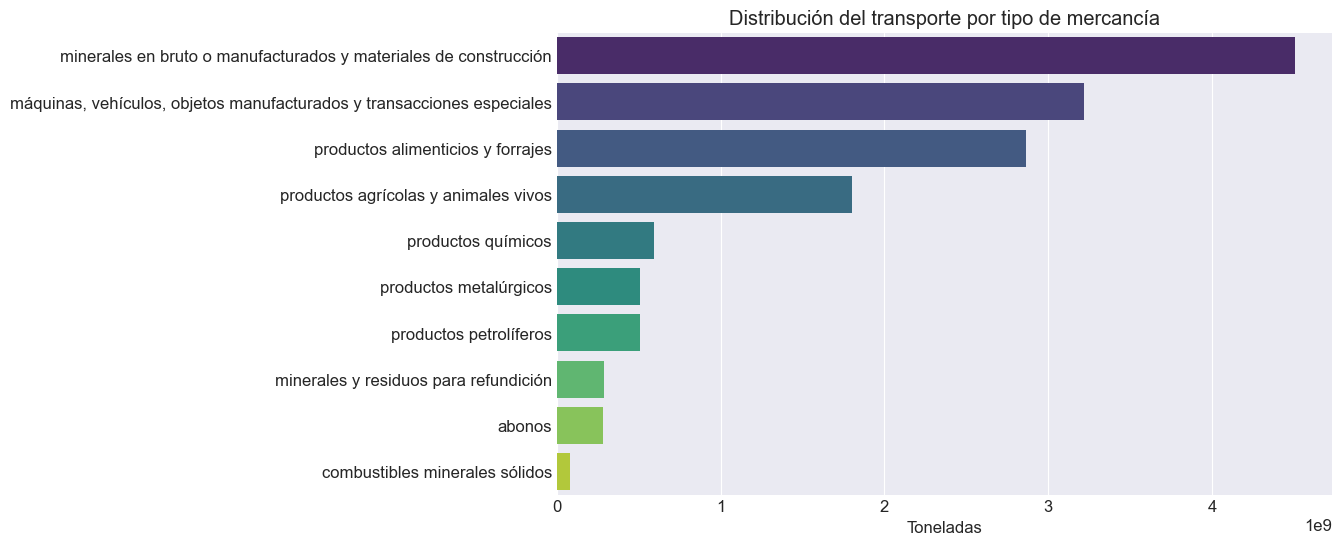

In [86]:
# Toneladas por tipo de mercancía
mercancias = (
    df_ton.groupby('tipo_mercancia')['valor_toneladas']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=mercancias, y='tipo_mercancia', x='valor_toneladas', palette="viridis")
plt.title('Distribución del transporte por tipo de mercancía')
plt.xlabel('Toneladas')
plt.ylabel('')
plt.show()

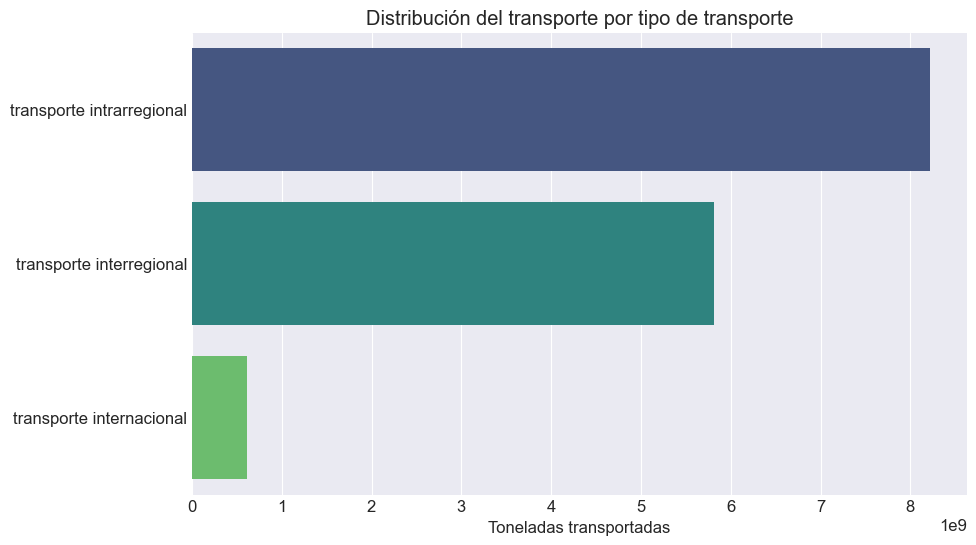

In [87]:
# Toneladas por tipo de transporte
transporte = (
    df_ton.groupby('tipo_transporte')['valor_toneladas']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=transporte, y='tipo_transporte', x='valor_toneladas', palette="viridis")
plt.title('Distribución del transporte por tipo de transporte')
plt.xlabel('Toneladas transportadas')
plt.ylabel('')
plt.show()

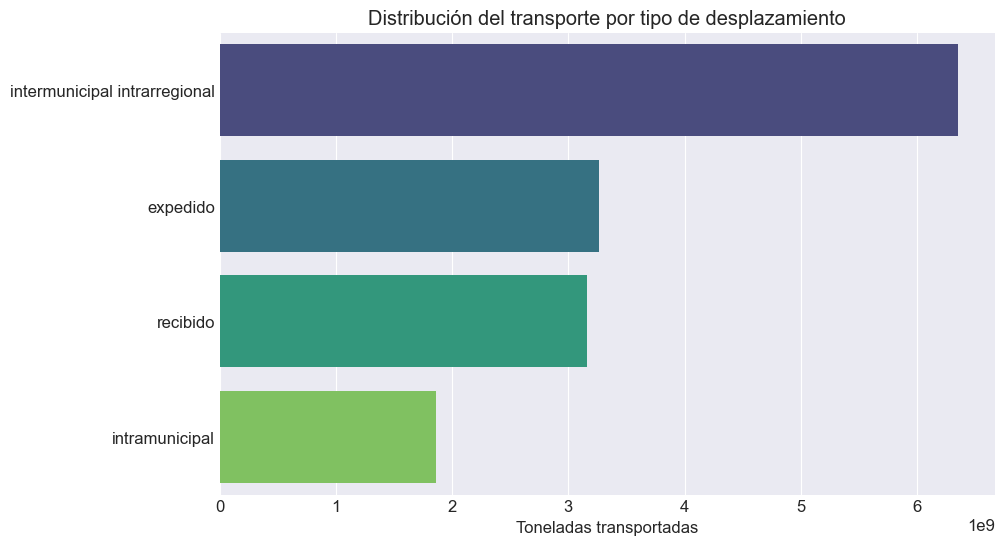

In [88]:
# Toneladas por tipo de desplazamiento
desplazamiento = (
    df_ton.groupby('tipo_desplazamiento')['valor_toneladas']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=desplazamiento, y='tipo_desplazamiento', x='valor_toneladas', palette="viridis")
plt.title('Distribución del transporte por tipo de desplazamiento')
plt.xlabel('Toneladas transportadas')
plt.ylabel('')
plt.show()

In [89]:
# Revisar duplicados
df_ton.duplicated().sum()


np.int64(0)

In [90]:
# Revisar columnas y tipos de dato finales
df_ton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6353 entries, 0 to 15098
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 6353 non-null   int64  
 1   comunidad            6353 non-null   object 
 2   tipo_transporte      6353 non-null   object 
 3   tipo_desplazamiento  6353 non-null   object 
 4   tipo_mercancia       6353 non-null   object 
 5   unidad               6353 non-null   object 
 6   valor                6353 non-null   float64
 7   valor_toneladas      6353 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 446.7+ KB


In [91]:
df_ton_km.duplicated().sum()
df_ton_km.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6353 entries, 1 to 15099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 6353 non-null   int64  
 1   comunidad            6353 non-null   object 
 2   tipo_transporte      6353 non-null   object 
 3   tipo_desplazamiento  6353 non-null   object 
 4   tipo_mercancia       6353 non-null   object 
 5   unidad               6353 non-null   object 
 6   valor                6353 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 397.1+ KB


In [92]:
# Obtener estadísticas preliminares columnas numéricas
df_ton.describe().round(2)


,year,valor,valor_toneladas
count,6353.00,6353.00,6353.00
mean,2020.48,2304.80,2304799.36
std,2.29,5353.40,5353403.04
min,2017.00,0.15,150.00
25%,2018.00,135.98,135980.00
50%,2020.00,561.70,561700.00
75%,2022.00,1990.79,1990790.00
max,2024.00,69220.52,69220520.00


In [93]:
df_ton_km.describe().round(2)

,year,valor
count,6353.00,6353.00
mean,2020.48,462.35
std,2.29,925.04
min,2017.00,0.00
25%,2018.00,20.35
50%,2020.00,107.76
75%,2022.00,451.37
max,2024.00,8766.09


In [94]:
# Obtener estadísticas preliminares todas las columnas
df_ton.describe(include='all').round(0)

,year,comunidad,tipo_transporte,tipo_desplazamiento,tipo_mercancia,unidad,valor,valor_toneladas
count,6353.0,6353,6353,6353,6353,6353,6353.0,6353.0
unique,NaN,15,3,4,10,1,NaN,NaN
top,NaN,cataluña,transporte interregional,expedido,"máquinas, vehículos, objetos manufacturados y ...",miles de toneladas,NaN,NaN
freq,NaN,455,2326,2067,720,6353,NaN,NaN
mean,2020.0,NaN,NaN,NaN,NaN,NaN,2305.0,2304799.0
std,2.0,NaN,NaN,NaN,NaN,NaN,5353.0,5353403.0
min,2017.0,NaN,NaN,NaN,NaN,NaN,0.0,150.0
25%,2018.0,NaN,NaN,NaN,NaN,NaN,136.0,135980.0
50%,2020.0,NaN,NaN,NaN,NaN,NaN,562.0,561700.0
75%,2022.0,NaN,NaN,NaN,NaN,NaN,1991.0,1990790.0


In [95]:
df_ton_km.describe(include='all').round(0)

,year,comunidad,tipo_transporte,tipo_desplazamiento,tipo_mercancia,unidad,valor
count,6353.0,6353,6353,6353,6353,6353,6353.0
unique,NaN,15,3,4,10,1,NaN
top,NaN,cataluña,transporte interregional,expedido,"máquinas, vehículos, objetos manufacturados y ...",millones de toneladas-kilómetro,NaN
freq,NaN,455,2326,2067,720,6353,NaN
mean,2020.0,NaN,NaN,NaN,NaN,NaN,462.0
std,2.0,NaN,NaN,NaN,NaN,NaN,925.0
min,2017.0,NaN,NaN,NaN,NaN,NaN,0.0
25%,2018.0,NaN,NaN,NaN,NaN,NaN,20.0
50%,2020.0,NaN,NaN,NaN,NaN,NaN,108.0
75%,2022.0,NaN,NaN,NaN,NaN,NaN,451.0


In [96]:
df_ton.sample(15)
ruta_guardado = os.path.join(ruta_datos, '..','..', 'processed', 'CO280_trafico_toneladas_clean.csv')
ruta_guardado
df_ton.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')
print(f"✅ Dataset final guardado en: {ruta_guardado}")

✅ Dataset final guardado en: ..\data\raw\csv\..\..\processed\CO280_trafico_toneladas_clean.csv


In [97]:
df_ton_km.sample(15)
ruta_guardado_ton_km = os.path.join(ruta_datos, '..','..', 'processed', 'CO280_trafico_ton_km_clean.csv')
ruta_guardado_ton_km
df_ton_km.to_csv(ruta_guardado_ton_km, index=False, encoding='utf-8-sig')
print(f"✅ Dataset final guardado en: {ruta_guardado_ton_km}")

✅ Dataset final guardado en: ..\data\raw\csv\..\..\processed\CO280_trafico_ton_km_clean.csv
